<a href="https://colab.research.google.com/github/massirism/Codes/blob/main/Perro_Pizza_Salchipapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate

# Sección nueva

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bs = 16 #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = '/content/drive/My Drive/Colab Notebooks/IA/Entrenamiento'

In [ ]:
                # INICIALIZACIÓN #
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes)      

There are  4 classes:
 ['Perro caliente', 'Pizza', 'Salchipapa', 'models']


In [ ]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: Perro caliente


Class: Pizza


Class: Salchipapa


Class: models


In [ ]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

In [ ]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 144 training images and 35 validation images.


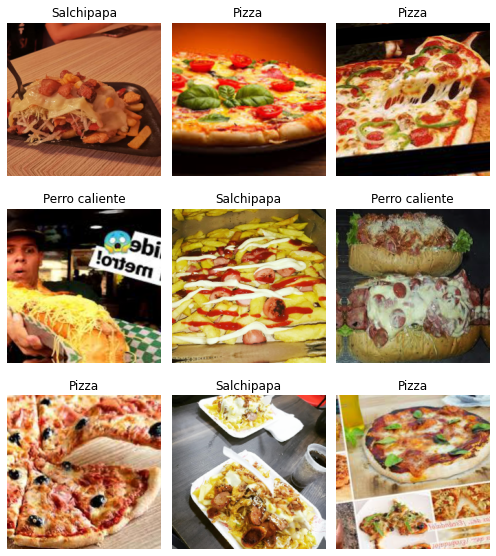

In [ ]:
#Muestreo de las imaganes, algo para ver el antes
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


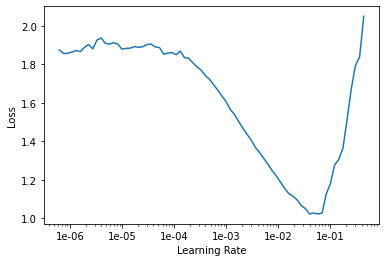

In [ ]:
learn.lr_find();
learn.recorder.plot();

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.144976,2.819276,0.514286,00:04
1,0.637750,0.211293,0.914286,00:04
2,0.451756,0.037211,1.000000,00:04
3,0.373513,0.022851,1.000000,00:04


In [ ]:
#INTERPRETACIÓN DE LOS RESULTADOS, LAS IMAGENES DENTRO DE LA DIAGONAL PRINCIPAL ESTÁN BIEN ETIQUETADAS, LAS QIE ESTÁN FUERA DE LA
#MATRIZ PRINCIPAL NOOO.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

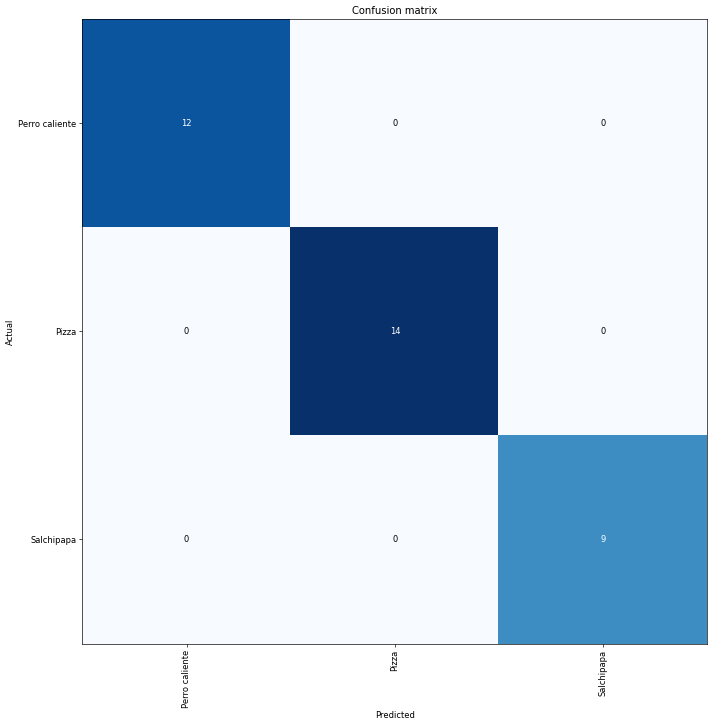

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

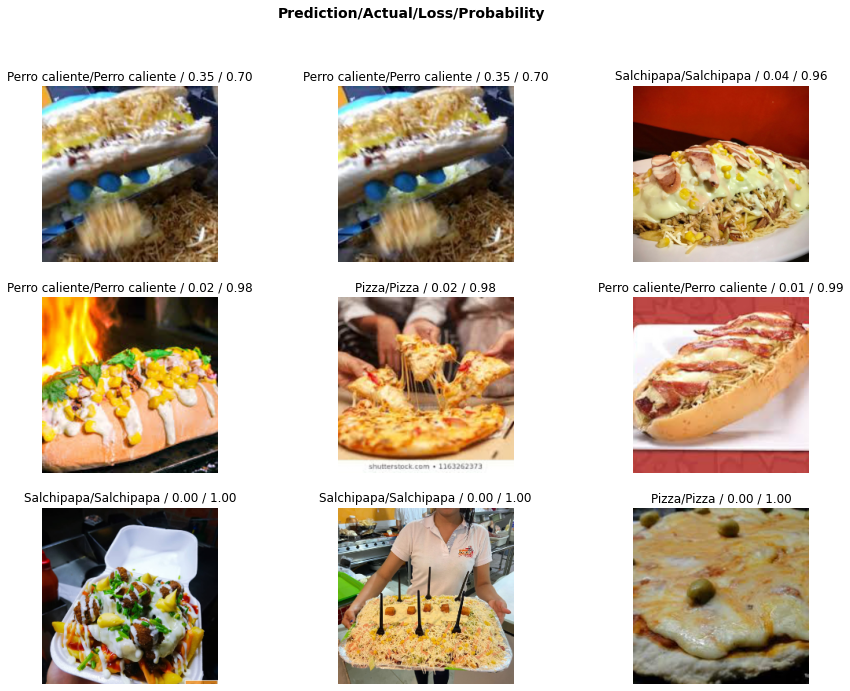

In [ ]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)
#Las imágenes se muestran junto con las principales pérdidas:
#tiqueta de predicción / etiqueta real / pérdida / probabilidad de la clase de imagen real.

**TESTEO DE LAS IMAGENES, VERIFICAMOS EL MODELO USANDO NUEVAS IMAGENES**

In [ ]:
path = '/content/nombres-de-pizzerias-italianas.jpg' #The path of your test image
img = open_image(get_image_files(path)[0])
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("It is a", pred_class)

NotADirectoryError: ignored

In [ ]:
!wget "https://www.ilmessaggeroip.com/wp-content/uploads/2018/01/nombres-de-pizzerias-italianas.jpg"

--2020-04-11 02:20:33--  https://www.ilmessaggeroip.com/wp-content/uploads/2018/01/nombres-de-pizzerias-italianas.jpg
Resolving www.ilmessaggeroip.com (www.ilmessaggeroip.com)... 64.34.65.10
Connecting to www.ilmessaggeroip.com (www.ilmessaggeroip.com)|64.34.65.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103219 (101K) [image/jpeg]
Saving to: ‘nombres-de-pizzerias-italianas.jpg’

nombres-de-pizzeria 100%[===================>] 100.80K   482KB/s    in 0.2s    

2020-04-11 02:20:34 (482 KB/s) - ‘nombres-de-pizzerias-italianas.jpg’ saved [103219/103219]

